In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import cross_val_score

titanic_data = pd.read_csv('/content/drive/MyDrive/BigData/train.csv')

np.random.seed(0)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId', 'Name','Survived','Ticket','Cabin'], axis = 1)

y = titanic_data.Survived

med = X.groupby('Sex')['Age'].transform('median')   #меняем пропуски возраста на средние в зависимости от пола
X = X.fillna({'Age': med})

X = pd.get_dummies(X)

In [5]:
#X = X.fillna({'Age' : X.Age.median()})


In [6]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

clf.fit(X, y)

clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [9]:
clf.score(X_test, y_test)

0.7932203389830509

In [10]:
max_depth_values = range(1,30)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  mean_cross = cross_val_score(clf, X_train, y_train, cv = 5).mean()

  temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross]})

  scores_data = pd.concat([scores_data, temp_score_data])



In [11]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

scores_data_long

,max_depth,set_type,score
0,1,train_score,0.790268
1,2,train_score,0.791946
2,3,train_score,0.825503
3,4,train_score,0.838926
4,5,train_score,0.865772
...,...,...,...
82,25,cross_val_score,0.803739
83,26,cross_val_score,0.807115
84,27,cross_val_score,0.807115
85,28,cross_val_score,0.807115


<Axes: xlabel='max_depth', ylabel='score'>

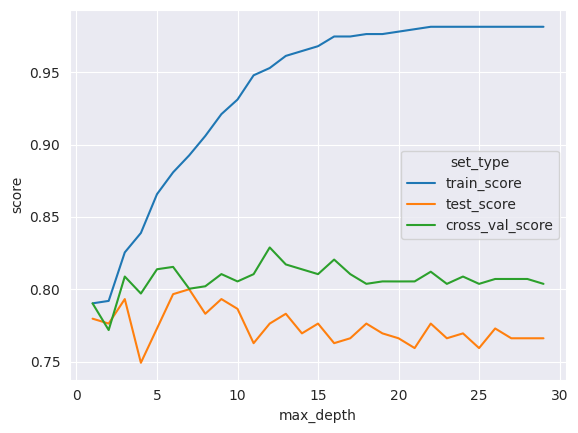

In [12]:
sns.set_style("darkgrid")
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [13]:
from sklearn.model_selection import cross_val_score

best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.6949152542372881

In [14]:
train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')  # то же самое только с ирисами
y_train_iris = train.species
X_train_iris = train.drop(['species', 'Unnamed: 0'], axis = 1)

test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')
y_test_iris = test.species
X_test_iris = test.drop(['species', 'Unnamed: 0'], axis = 1)

np.random.seed(0)

X_test_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [15]:
max_depth_values = range(1,30)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train_iris, y_train_iris)
  train_score = clf.score(X_train_iris, y_train_iris)
  test_score = clf.score(X_test_iris, y_test_iris)

  temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})

  scores_data = pd.concat([scores_data, temp_score_data])
scores_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
0,6,1.00,0.94
0,7,1.00,0.94
0,8,1.00,0.92
0,9,1.00,0.92
0,10,1.00,0.92


In [16]:
scores_data_long_iris = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

<Axes: xlabel='max_depth', ylabel='score'>

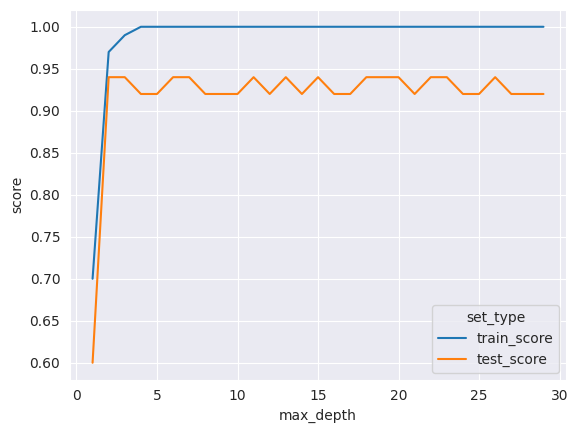

In [17]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long_iris)

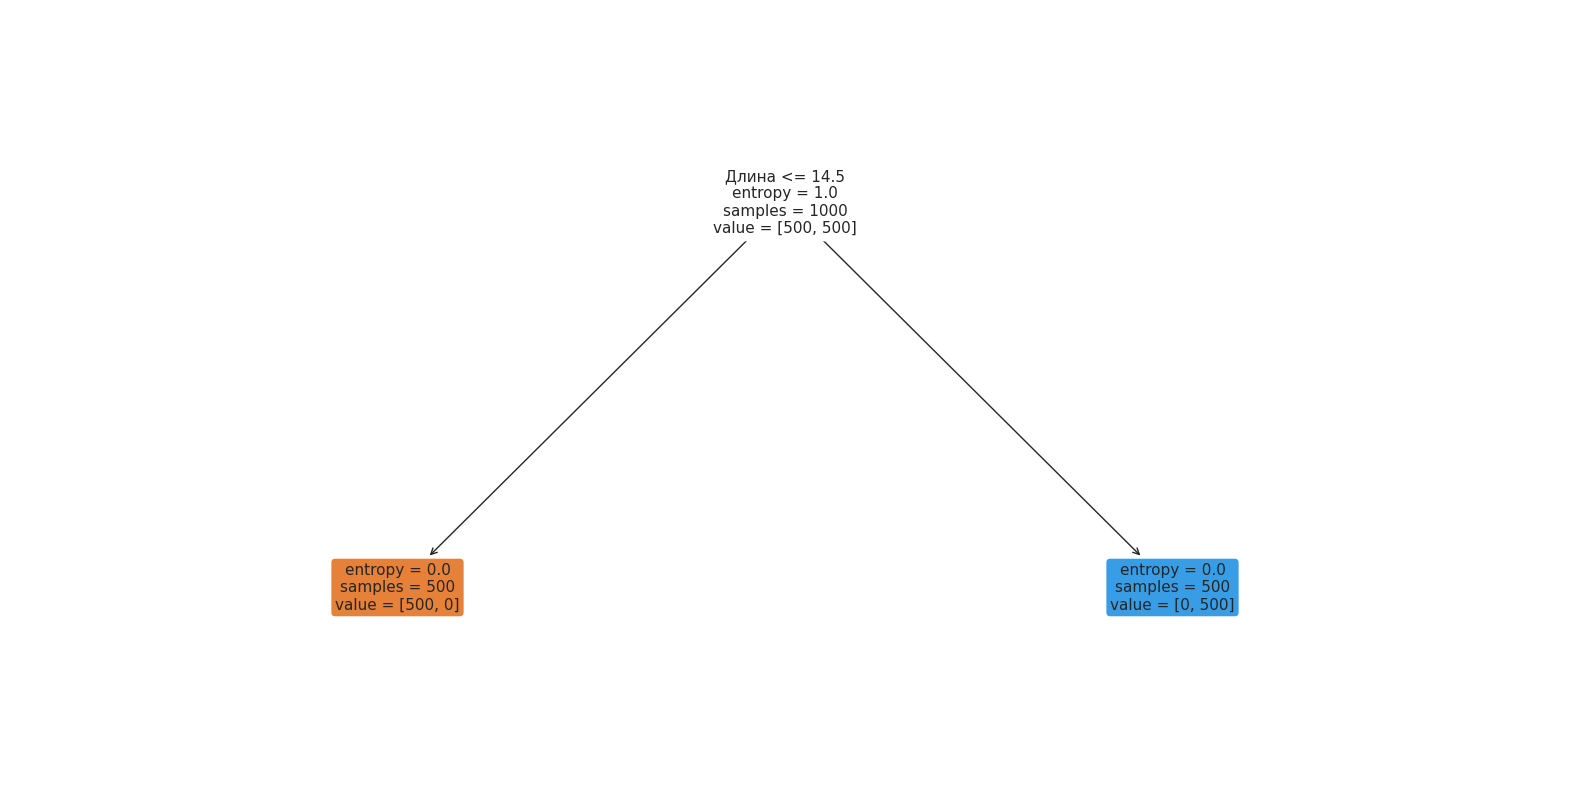

In [18]:
cats_and_dogs = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

y_train_cats = cats_and_dogs.Вид
X_train_cats = cats_and_dogs.drop(['Вид'], axis = 1)

clf = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_cats, y_train_cats)
test_score = clf.score(X_train_cats, y_train_cats)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               feature_names=list(X_train_cats),
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
clf=tree.DecisionTreeClassifier()

grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [20]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
y_pred = best_clf.predict(X_test)

In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7043478260869566

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7043478260869566